In [8]:
import torch

In [9]:
import h5py
test_nm = 'drive/MyDrive/3d_mnist/full_dataset_vectors.h5'
hf = h5py.File(test_nm)


In [10]:
with h5py.File(test_nm) as dataset:
    x_train = dataset["X_train"][:]
    x_test = dataset["X_test"][:]
    y_train = dataset["y_train"][:]
    y_test = dataset["y_test"][:]

In [11]:
x_train.shape

(10000, 4096)

In [12]:
import colorsys
from tqdm import tqdm
colorsys.rgb_to_hsv([0, .4], [0, .4], [0, .4]), colorsys.hsv_to_rgb(0.25, 0.5, 0.4)

((0.0, 0.0, [0, 0.4]), (0.30000000000000004, 0.4, 0.2))

In [13]:
a = torch.tensor([10, 4, 0])
a % 4

tensor([2, 0, 0])

In [14]:
from skimage import color
# skimage.color.hsv2rgb(

NameError: ignored

In [59]:
templ = x_train[0].reshape(1, 16, 16, 16)[0, 8].reshape(1, 16, 16)

from functools import partial
import numpy as np


def get_colored(imgs, thr = None):
    assert len(imgs.shape) == 2
    init_shape = imgs.shape
    imgs = torch.unsqueeze(imgs, dim=-1)
    

    result = np.zeros((*imgs.shape, 3), float) 

    seeds = torch.Tensor(np.random.uniform(size=(init_shape[0], 2)))

    seeds = torch.broadcast_to(seeds, (*init_shape[::-1], 2))
    seeds = torch.permute(seeds, [1, 0, 2])


    result = torch.concat([seeds, imgs], dim=-1)

    
    result = torch.Tensor(color.hsv2rgb(result))
    return result


a = get_colored(torch.Tensor(templ.reshape(-1, 16 * 16)))

torch.Size([1, 256, 1])
torch.Size([1, 256, 2])


In [60]:
a.shape

torch.Size([1, 256, 3])

In [ ]:
a

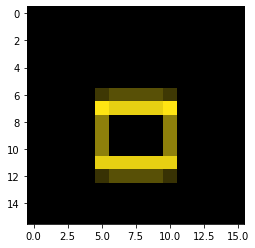

In [62]:
import matplotlib.pyplot as plt

plt.imshow(a.reshape(16, 16, 3))
plt.show()

In [63]:
ds_train_colored = get_colored(torch.Tensor(x_train))

torch.Size([10000, 4096, 1])
torch.Size([10000, 4096, 2])


In [ ]:
ds_test_colored = get_colored(x_test)

2000it [00:17, 117.58it/s]


In [64]:
np.save('ds_train_colored.npy', ds_train_colored)
np.save('ds_test_colored.npy', ds_test_colored)

NameError: ignored

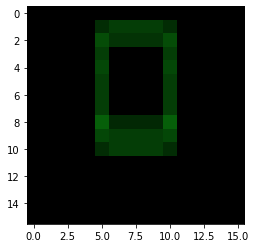

In [71]:
temp = ds_train_colored[1322]
plt.imshow(temp.reshape(16, 16, 16, 3)[7])

In [ ]:
! cp ds_test_colored.npy drive/MyDrive/ds_test_colored.npy
! cp ds_train_colored.npy drive/MyDrive/ds_train_colored.npy